# Data Visualization on Sine Oscillator
This is a sanity check if the experiment and data recording is set up correctly. We use a sinus oscillator to generate the data stream:
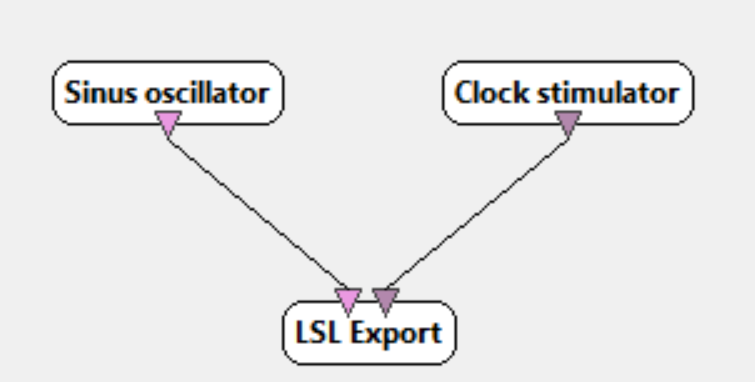


## 1. Read CSVs

In [10]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_folder = '../data/test/session_20250705_1905'
eeg_path = f'{csv_folder}/eeg_data.csv'
gui_path = f'{csv_folder}/gui_data.csv'

eeg_data = pd.read_csv(eeg_path)
gui_data = pd.read_csv(gui_path)

In [3]:
print(eeg_data)
print(gui_data)

         timestamp  channel_0  channel_1  channel_2  channel_3
0       283.125000   0.687730   0.743293   0.695649   0.647149
1       283.126953   0.780424   0.665433   0.383860   0.251144
2       283.128906   0.859163   0.519112   0.000243  -0.048325
3       283.130859   0.922585   0.310137  -0.396751  -0.136111
4       283.132812   0.969589   0.048702  -0.745902   0.044415
...            ...        ...        ...        ...        ...
183931  642.365234  -0.064975   1.460537  -0.038102   1.905484
183932  642.367188  -0.195006   1.650284  -0.091591   1.729406
183933  642.369141  -0.315226   1.774957   0.006512   1.363640
183934  642.371094  -0.423795   1.829963   0.231681   0.933811
183935  642.373047  -0.519076   1.815540   0.539582   0.582426

[183936 rows x 5 columns]
     trial   timestamp  target  stimulus  is_target
0        0  284.699219       1         1          1
1        0  284.999023       1         2          0
2        0  285.299805       1         0          0
3        

## 2. Average over 12 epochs

Data is stuctured as follows
- We have 3 blocks
- Each block has 3 trials. Within each trial, the target is constant. This means that the participant constantly looks at the same target during one trial. Within one block, the targets are 1x rock, 1x paper, 1x scissors -> 3 trials
- Each trial has 12 epochs
- In each epoch all 3 stimuli are displayed in random order

In [ ]:
#start with trial 0 -> target is always 1
trial_0 = gui_data[gui_data['trial'] == 0]
#print(trial_0)


window = [-0.1, 0.5]



In [15]:
# We average over all epochs of trial 0, where target is 1

# define time window around event
window = [-0.1, 0.5]  # seconds

trial_0 = gui_data[gui_data['trial'] == 0]
event_times = trial_0[trial_0['is_target'] == 1]['timestamp'].values

# Sampling rate from EEG timestamps
eeg_timestamps = eeg_data['timestamp'].values
sampling_interval = np.median(np.diff(eeg_timestamps))
sampling_rate = 1.0 / sampling_interval

# Convert window to sample indices
samples_before = int(abs(window[0]) * sampling_rate)
samples_after = int(window[1] * sampling_rate)
segment_length = samples_before + samples_after + 1
time_vector = np.linspace(window[0], window[1], segment_length)

# Collect segments
segments = []
for event_time in event_times:
    # Find index of closest timestamp
    event_idx = np.argmin(np.abs(eeg_timestamps - event_time))

    # Define bounds
    start_idx = event_idx - samples_before
    end_idx = event_idx + samples_after + 1

    # Check bounds
    if start_idx >= 0 and end_idx <= len(eeg_data):
        segment = eeg_data.iloc[start_idx:end_idx].drop(columns='timestamp').values
        segments.append(segment)

# Convert to array: [n_events, n_samples, n_channels]
segments_array = np.stack(segments) if segments else None

print(segments_array.shape)


(12, 308, 4)


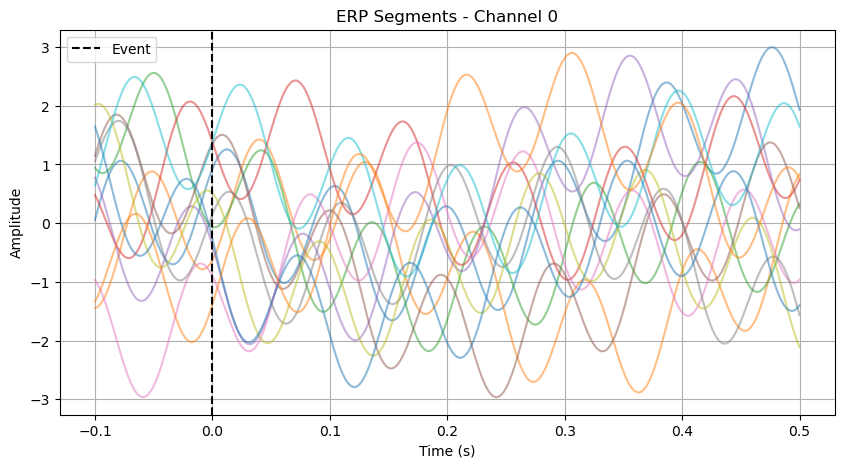

In [14]:
import matplotlib.pyplot as plt

# Assume segments_array is of shape (n_events, n_samples, n_channels)
channel_idx = 0  # change this to select a different channel

plt.figure(figsize=(10, 5))
for i in range(segments_array.shape[0]):
    plt.plot(time_vector, segments_array[i, :, channel_idx], alpha=0.5)

plt.title(f"ERP Segments - Channel {channel_idx}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.axvline(0, color='k', linestyle='--', label='Event')
plt.grid(True)
plt.legend()
plt.show()
